# Dike Model Analysis

In [20]:
# import libraries
from ema_workbench import load_results
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench.analysis import prim

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Visual Analysis

In [2]:
experiments, outcomes = load_results('./data/preliminary_results_pr1.tar.gz')

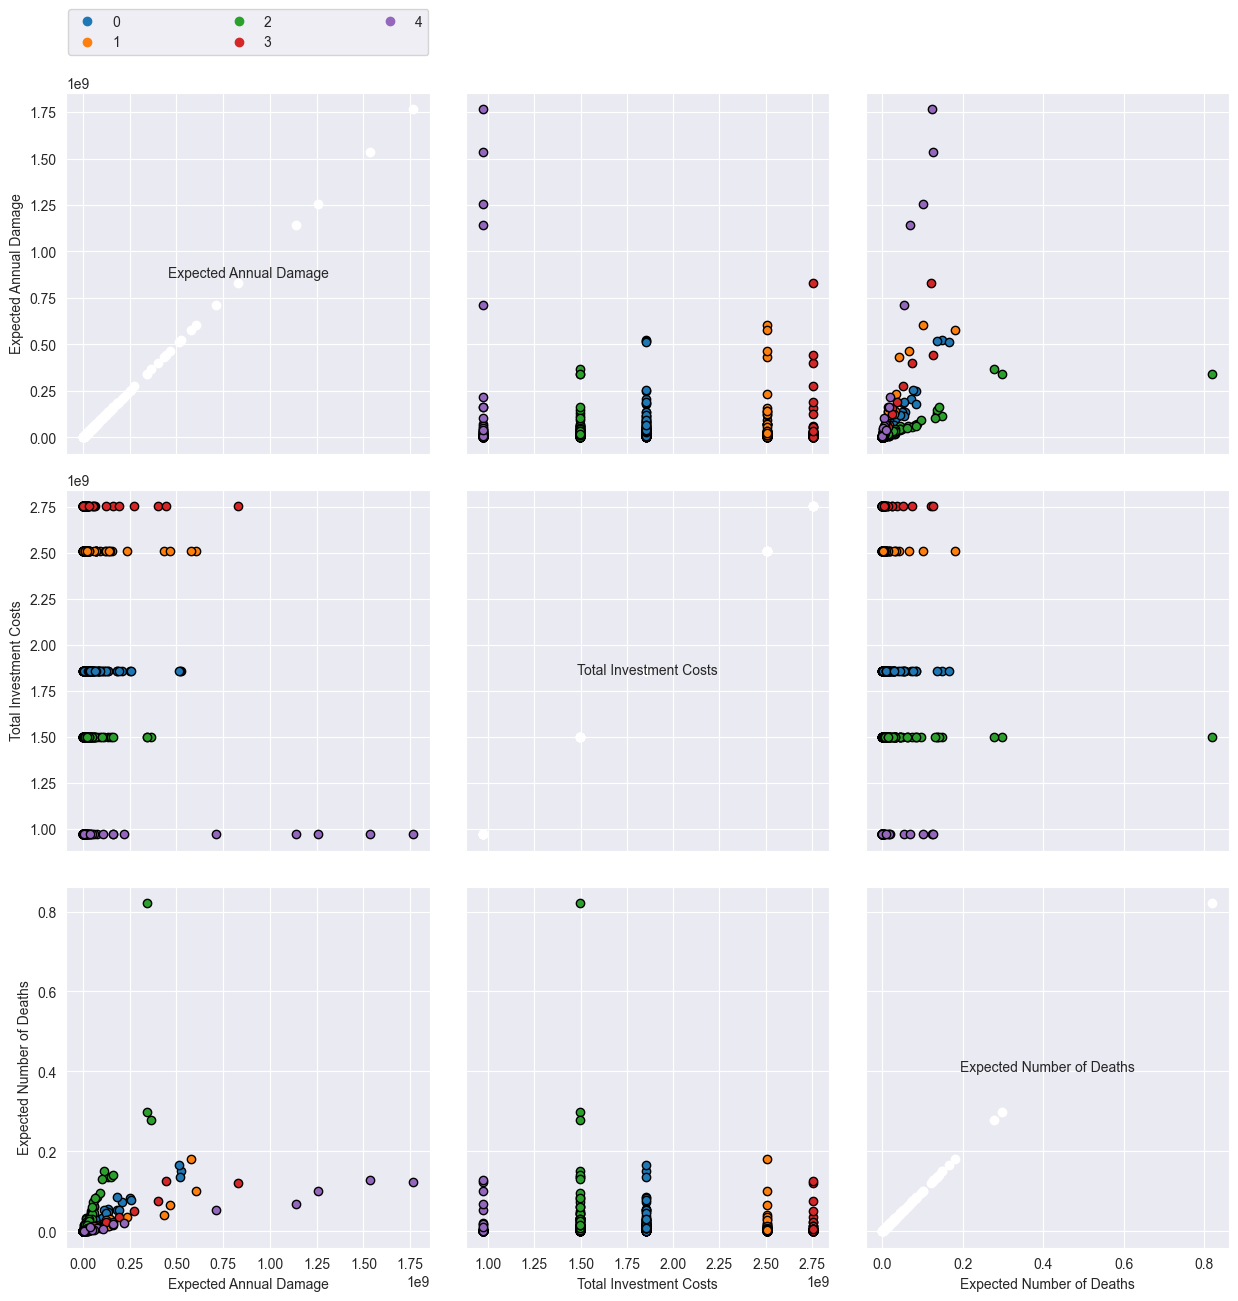

In [3]:
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

## Scenario discovery

In [4]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,2,323.910277,1.0,0.176332,291.533232,1.5,0.488146,50.673228,1.0,0.389553,...,0,8,4,1,1,10,1,5,0,dikesnet
1,37,88.272223,10.0,0.608668,116.326922,10.0,0.891922,177.784617,1.5,0.566913,...,0,8,4,1,1,10,1,6,0,dikesnet
2,55,151.383431,10.0,0.068460,196.348462,1.5,0.928873,231.027315,10.0,0.814843,...,0,8,4,1,1,10,1,7,0,dikesnet
3,62,264.790667,10.0,0.762495,127.739208,10.0,0.960115,299.818071,10.0,0.221314,...,0,8,4,1,1,10,1,8,0,dikesnet
4,84,48.242742,1.0,0.147054,135.070986,10.0,0.350167,297.068166,1.0,0.137465,...,0,8,4,1,1,10,1,9,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,112,126.406267,10.0,0.739360,160.686207,1.5,0.205165,305.841896,1.0,0.872698,...,3,2,3,5,10,1,4,100,4,dikesnet
496,97,82.796054,1.5,0.427493,218.832861,1.0,0.188584,337.965862,1.5,0.451210,...,3,2,3,5,10,1,4,101,4,dikesnet
497,132,292.467485,1.5,0.036879,93.177458,1.0,0.440691,137.210676,10.0,0.702679,...,3,2,3,5,10,1,4,102,4,dikesnet
498,120,63.813470,1.0,0.802033,272.272984,1.5,0.323435,197.084170,10.0,0.172942,...,3,2,3,5,10,1,4,103,4,dikesnet


In [7]:
# clean up experiments
X = experiments.iloc[:, 0:50]

In [10]:
outcomes.keys()

dict_keys(['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths'])

In [12]:
# Calculate the 10th percentile
threshold = np.percentile(outcomes['Expected Annual Damage'], 20) 
# Show threshold
print(f"The threshold for 10% worst outcomes for expected annual damage equals {threshold}.")

The threshold for 10% worst outcomes for expected annual damage equals 465143.7062686423.


In [14]:
# Get column to optimise
opt = outcomes['Expected Annual Damage']
# To dataframe
opt = pd.DataFrame(opt)

In [15]:
opt

,0
0,2.328293e+07
1,2.084575e+08
2,5.242381e+08
3,1.800853e+08
4,3.391469e+07
...,...
495,2.468604e+06
496,0.000000e+00
497,1.140222e+09
498,5.292759e+06


In [16]:
opt['Expected Annual Damage'] = np.where(opt[0] < threshold, 1, 0)

In [17]:
opt

,0,Expected Annual Damage
0,2.328293e+07,0
1,2.084575e+08,0
2,5.242381e+08,0
3,1.800853e+08,0
4,3.391469e+07,0
...,...,...
495,2.468604e+06,0
496,0.000000e+00,1
497,1.140222e+09,0
498,5.292759e+06,0


In [18]:
y = opt['Expected Annual Damage'].to_numpy()

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
# Define PRIM
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.05)

In [22]:
box = sd_alg.find_box()

/Users/milanmoleman/PycharmProjects/EPA141A-labs/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


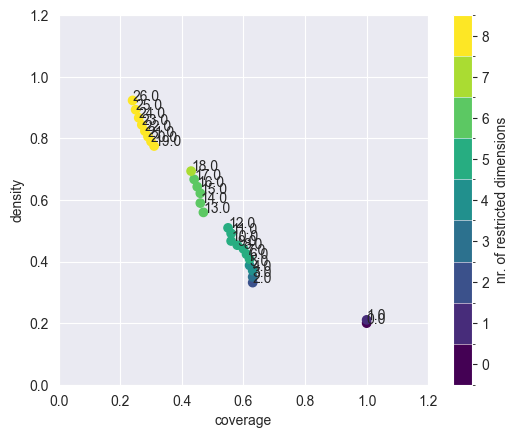

In [23]:
box.show_tradeoff(annotated=True)
plt.show()